# Lecture 3: Image Denoising with Gradient Descent and Early Stopping

A derivation of least squares gradient descent and ODE analysis

Simon Ghyselincks  
2024-09-17

## Derivations of Linear Algebra Gradients

Often times we wish to find the gradient of a multi-variable function
that is formulated as a linear algebra operation. In this case there are
some useful “vector” derivatives and rules that can simplify the process
of calculating more complex expressions. The gradient with respect to
vector $\mathbf{x}$ is generally denoted as $\nabla_{\mathbf{x}}$ or
alternatively $\partial_{\mathbf{x}}$, somewhat of an abuse of notation.

#### 1. A Warmup

$$\phi(x) = a^\top x = \sum_i a_i x_i$$

This is a vector dotproduct and the gradient is simply the vector $a$.
There is a subtlety here in that the vector is usually transposed to be
a column vector, but this is not always the case. Some people in the
field of statistics prefer to use row vector, this can cause some
confusion. The general convention is a column vector.

$$\nabla_{\mathbf{x}} \phi = a$$

#### 2. Matrix Vector Multiplication

$$\phi(x) = Ax$$

Based on the previous process we are expecting to potentially get
$A^\top$ as the gradient, however the transpose does not occur in this
case because we are not returning a vector that needs to be reshaped
into a column form.

$$\nabla_{\mathbf{x}} \phi = A$$

#### 3. Quadratic Forms

Often we may encounter quadratic linear functions that are of the form:
$$ \phi(x) = x^\top A x$$

One way to determine the gradient is to expand the expression and
evaluate for a single $\frac{\partial}{\partial x_i}$ term. This method
can be found at [Mark Schmidt
Notes](https://www.cs.ubc.ca/~schmidtm/Courses/340-F16/linearQuadraticGradients.pdf)
Instead we can apply a chain rule for matrix differentiation that is
based on the product rule for differentiation. The chain rule for matrix
differentiation is as follows:

$$\frac{d f(g,h)}{d x} = \frac{d (g(x)^\top)}{d x} \frac{\partial f(g,h)}{\partial g} + \frac{d (h(x)^\top)}{d x} \frac{\partial f(g,h)}{\partial h}$$

$$ \begin {align*}
\phi(x) &= x^\top A x \\
\nabla_{\mathbf{x}} \phi &= \nabla_{\mathbf{x}} (x^\top A x) \\
&= \nabla_{\mathbf{x}} x^\top (A x) =  \nabla_{\mathbf{x}} x^\top y\\
&= (\nabla_{\mathbf{x}} x) \nabla_{\mathbf{x}} x^\top y + \nabla_{\mathbf{x}} y^\top \nabla_{\mathbf{y}} x^\top y\\
&= I y + \nabla_{\mathbf{x}} (x^\top A^\top) x\\
&= (A x) + A^\top x\\
&= (A + A^\top) x
\end {align*}
$$

This fits with the generalization for a scalar quadratic form where we
end up with $(cx^2)' = (c + c^\top)x = 2cx$ where $c$ is a scalar.

#### 4. Hadamard Product

Another form of interest is the hadamard product of two vectors.
$$\phi(x) = (Ax)^2 = Ax \odot Ax$$

For this one let $y=Ax$ and we can index each element of the vector $y$
as $y_i = \sum_j A_{ij} x_j$. The hadamard product is a vector $z$ where
$z_i = y_i^2$, we can compute the jacobian since now we are taking the
gradient with respect to a vector.

The Jacobian will contain the partial derivatives:

$$\frac{d\vec{z}}{d\vec{x}} = \begin{bmatrix} \frac{\partial z_1}{\partial x_1} & \frac{\partial z_1}{\partial x_2} & \cdots & \frac{\partial z_1}{\partial x_n} \\
\frac{\partial z_2}{\partial x_1} & \frac{\partial z_2}{\partial x_2} & \cdots & \frac{\partial z_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial z_n}{\partial x_1} & \frac{\partial z_n}{\partial x_2} & \cdots & \frac{\partial z_n}{\partial x_n} \end{bmatrix}
$$

If we can recover this then we have the gradient of the hadamard
product.

$$
\begin{align*}
z_i &= y_i^2 = \left( \sum_j A_{ij} x_j \right)^2\\
\frac{\partial}{\partial x_j} y_i^2 &= 2 y_i \frac{\partial y_i}{\partial x_j} = 2 y_i A_{ij}\\
\frac{d\vec{z}}{d\vec{x}} &= 2 \begin{bmatrix} y_1 A_{1j} & y_1 A_{2j} & \cdots & y_1 A_{nj} \\
y_2 A_{1j} & y_2 A_{2j} & \cdots & y_2 A_{nj} \\
\vdots & \vdots & \ddots & \vdots \\
y_n A_{1j} & y_n A_{2j} & \cdots & y_n A_{nj} \end{bmatrix}\\
&= 2 \cdot \text{diag}(\vec{y})A\\
&= 2 \cdot \text{diag}(Ax)A
\end{align*}
$$

#### 5. Least Squares Gradient

We look at taking the gradient of the expansion of least squares to find
the gradient for this optimization objective.

$$\phi(x) = \frac{1}{2} ||Ax - b||^2 = \frac{1}{2} (x^\top A^\top A x - 2 b^\top A x + b^\top b)$$

$$ \begin{align*}
\nabla_{\mathbf{x}} \phi &= \nabla_{\mathbf{x}} \left( \frac{1}{2} (x^\top A^\top A x - 2 b^\top A x + b^\top b) \right)\\
&= \nabla_{\mathbf{x}} \left( \frac{1}{2} x^\top A^\top A x \right) - \nabla_{\mathbf{x}} \left( b^\top A x \right)\\
&= \frac{1}{2} (A^\top A + A^\top A) x - A^\top b\\
&= A^\top A x - A^\top b\\
\end{align*}
$$

Returning to the first-order optimality condition we have:
$$A^\top A x = A^\top b$$

At which point it is in question if $A^\top A$ is invertible. The
invertibility of $A^\top A$ is determined by the rank of $A$. The rank
of A for a non-square matrix is the number of independent columns. If we
examine $A^\top Ax = 0$ then we see that this is only true where the
range of $A$ is in the nullspace of $A^\top$. But
$N(A^\top) = R(A)^\perp$ so they are orthogonal subspaces and will never
coincide unless $Ax=0$. So then $A^\top A x = 0$ implies that $Ax = 0$
which means that if the null space of $A=\{0\}$ then the null space of
$A^\top A = \{0\}$ and $A^\top A$ is invertible. Since $A^\top A$ is
symmetric and positive definite, it is invertible.

$A^\top A$ is invertible $\iff$ $A$ is full rank, that is all the
columns are independent. For non-square matrices, an $m>n$ matrix that
is wide will trivially not satisfy this condition. A tall matrix $m<n$
will satisfy the condition if the columns are independent.

## Gradient Descent Analysis

The standard form of the gradient descent algorithm comes from the field
of optimization and can be written as:

$$ x_{k+1} = x_k - \alpha \nabla_x \phi(x_k)$$

Where $\alpha$ is the learning rate, which can be dependent on the
problem and the gradient. Substituting the gradient of the least squares
problem we have:

$$ \begin{align}
x_{k+1} &= x_k - \alpha (A^\top A x_k - A^\top b)\\
\frac{x_{k+1}-x_k}{\alpha} &= A^\top b - A^\top A x_k\\
\lim_{\alpha \to 0} \frac{x_{k+1}-x_k}{\alpha} &= \frac{dx}{dt} = A^\top (b -A x), \quad x(0) = x_0
\end{align}
$$

This ODE is the continuous version of the gradient descent algorithm,
also known as the *gradient flow*. Since this a linear first-order ODE
we can solve it analytically. The general method for a linear system ODE
would be to find the homogeneous solution and the particular solution:

$$ \begin{align}
x' + A^\top A x &= A^\top b\\
\text{Guess:} x &= v e^{\lambda t}\\
\lambda v e^{\lambda t} + A^\top A v e^{\lambda t} &= A^\top b e^{\lambda t}\\
\lambda v + A^\top A v &= 0 \qquad \text{Homogeneous}\\
(\lambda I + A^\top A) v &= 0\\
\lambda &= \text{eigenvalues of } A^\top A, \quad v = \text{eigenvectors of } A^\top A
\end{align}
$$

Before continuing further with this line, we can see that the solutions
will be closely related to the SVD because it contains the information
on these eigenvalues and vectors. So we can try to solve the ODE with
the SVD.

#### Solving the ODE with SVD

$$\begin{align}
A &= U \Sigma V^\top\\
A^TA &= V \Sigma^2 V^\top\\
\frac{d}{dt}x &= V \Sigma U^\top b - V \Sigma^2 V^\top x\\
\end{align}
$$

Now let $z = V^\top x$ and $\hat b = U ^ \top b$ then we have:

$$\begin{align}
\frac{d}{dt} (V^\top x) &= \Sigma \hat b - \Sigma^2 (V^\top x)\\
\frac{d}{dt} z &= \Sigma \hat b - \Sigma^2 z\\
z' + \Sigma^2 z &= \Sigma \hat b\\
\end{align}
$$

At this stage since everything has been diagonalized, all of the
equations are decoupled and independent so we can solve for the
$\lambda_i$ cases independently. We find the homogeneous $z_h$ and
particular $z_p$ solutions:

$$
\begin{align}
z_h' + \lambda^2 z_h &= 0\\
z_h &= c e^{-\lambda^2 t}\\
z_p' + \lambda^2 z_p &= \lambda \hat b\\
z_p &= D \hat b \\
\lambda^2 D \hat b &= \lambda \hat b\\
D &= \frac{1}{\lambda}\\
z_p &= \frac{1}{\lambda} \hat b
\end{align}
$$

So the general solution for the $i^{th}$ component is:

$$z_i = c_i e^{-\lambda_i^2 t} + \frac{1}{\lambda_i} \hat b_i$$

Supposing that we start at $x=0$ then we have $z=0$ at all elements and
can solve the coefficients $c_i$:

$$c_i = -\frac{1}{\lambda_i} \hat b_i$$

Then putting it all back together with all the equations we have that

$$Z = \text{diag}\left( \lambda_i^{-1} (1 - \exp (-\lambda_i t)) \right) \hat b$$

Substituting back in for $x$ and $b$ we get:

$$x = V \text{diag}\left( \lambda_i^{-1} (1 - \exp (-\lambda_i t)) \right) U^\top b$$

If we stare at this long enough it begins to look a lot like the
pseudoinverse of $A$ from earlier:

$x = V \Sigma^{-1} U^\top b$ except in this case there is a time
dependence. At the limit as $t \rightarrow \infty$ we have that the
exponential term goes to zero and we are left with the pseudoinverse
solution. This is a nice way to see that the pseudoinverse is the limit
of the gradient descent algorithm. What we may be interested in is what
happens at earlier stages since each decay term is dependent on the
eigenvalues.

For a simple matrix problem we can create a matrix and plot out the time
evolution of the diagonals of the matrix that are of interest. In a
sense, we have singular values that are time evolving at different
rates.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(4)
# Create a 5x10 matrix A with random values
A = np.random.randn(5, 10)
# Create a vector b of size 5 with random values
b = np.random.randn(5)

# Compute the SVD of A
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Create a time dependent vector of the singular values
def St(t):
    Sdim = S[:, np.newaxis]
    return (1 - np.exp(-Sdim**2*t)) / Sdim

# Compute the time evolution of the values and plot them on a log scale y axis with a linear time x axis
t = np.linspace(0, .6, 100)
T = t[np.newaxis, :]

singular_vals_t = St(T)

# Initialize the plot
plt.figure(figsize=(7.5, 4))

# Create a color palette
palette = sns.color_palette("husl", len(S))

# Plot the singular values and their asymptotes
for i in range(len(S)):
    # Plot the time evolution of each singular value
    sns.lineplot(x=t, y=singular_vals_t[i, :], color=palette[i], linewidth=2, label=f'$1/S_{i}$ ')
    
    Sinv = 1/S[i]

    # Add a horizontal asymptote at the original singular value
    plt.axhline(y=Sinv, color=palette[i], linestyle='--', linewidth=1)
    
    # Annotate the asymptote with the singular value
    plt.text(t[-1] + 0.02, Sinv, f'{Sinv:.2f}', color=palette[i], va='center')

# Configure plot aesthetics
plt.xlabel('Time', fontsize=14)
plt.ylabel('Inverse Singular Vals', fontsize=14)
plt.title('Time Evolution of Pseudo Inverse in Gradient Flow', fontsize=16)
plt.legend(title='Inverse Singular Vals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(t[0], t[-1] + 0.1)
plt.tight_layout()
plt.savefig('imgs/pseudo_inverse_time_evolution.png')
plt.show()

So we can use early stopping to prevent the flow from reaching the
optimal point, a very useful technique. When it comes to inverse theory,
often we are not interested in the optimal solution, but more interested
in getting somewhere close that is not too noisy. This method differs
from the thresholded pseudoinverse from the previous lecture, in that it
allows some blending of the the smaller singular values, but their
propensity for blowing up is controlled by the time exponent and early
stopping.

### Example for Image Recovery using Analytic Solution

Referring back to the problem of estimating the original image based on
a noisy point spread function. We can monitor the time evolution of the
estimate using gradient flow. Some code below defines the problem again,
with recovery of the SVD decomposition for the 32x32 image, which will
be used to solve the ODE for the gradient flow.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
import numpy as np
import torch.optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import copy

import seaborn as sns

import math
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch.fft

class gaussianConv(nn.Module):
    """
    A PyTorch module that applies a Gaussian convolution to an input image using 
    a parameterized Gaussian Point Spread Function (PSF). The PSF is derived 
    from a covariance matrix and the derivatives of the Gaussian are computed 
    for edge detection.

    Args:
        C (torch.Tensor): Inverse of covariance matrix used to define the shape of the Gaussian.
        t (float, optional): Scaling factor for the Gaussian, default is np.exp(5).
        n0 (float, optional): Scaling factor for the original PSF, default is 1.
        nx (float, optional): Scaling factor for the derivative along the x-axis, default is 1.
        ny (float, optional): Scaling factor for the derivative along the y-axis, default is 1.
    """
    def __init__(self, C, t=np.exp(5), n0=1, nx=1, ny=1):
        super(gaussianConv, self).__init__()

        self.C = C
        self.t = t
        self.n0 = n0
        self.nx = nx
        self.ny = ny

    def forward(self, image):
        P, center = self.psfGauss(image.shape[-1], image.device)
        P_shifted = torch.roll(P, shifts=center, dims=[2, 3])
        S = torch.fft.fft2(P_shifted)
        I_fft = torch.fft.fft2(image)
        B_fft = S * I_fft
        B = torch.real(torch.fft.ifft2(B_fft))

        return B

    def psfGauss(self, dim, device='cpu'):
        m = dim
        n = dim

        # Create a meshgrid of (X, Y) coordinates
        x = torch.arange(-m // 2 + 1, m // 2 + 1, device=device)
        y = torch.arange(-n // 2 + 1, n // 2 + 1, device=device)
        X, Y = torch.meshgrid(x, y, indexing='ij')
        X = X.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)
        Y = Y.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)

        cx, cy, cxy = self.C[0, 0], self.C[1, 1], self.C[0, 1]

        PSF = torch.exp(-self.t * (cx * X ** 2 + cy * Y ** 2 + 2 * cxy * X * Y))
        PSF0 = PSF / torch.sum(PSF.abs())

        Kdx = torch.tensor([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=PSF0.dtype, device=device) / 4
        Kdy = torch.tensor([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]], dtype=PSF0.dtype, device=device) / 4

        Kdx = Kdx.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)
        Kdy = Kdy.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)

        PSFdx = F.conv2d(PSF0, Kdx, padding=1)
        PSFdy = F.conv2d(PSF0, Kdy, padding=1)

        PSF_combined = self.n0 * PSF0 + self.nx * PSFdx + self.ny * PSFdy

        center = [1 - m // 2, 1 - n // 2]

        return PSF_combined, center

dim = 32
x = torch.zeros(1, 1, dim, dim)
x[:,:, 12:14, 12:14] = 1.0
x[:,:, 10:12, 10:12] = -1.0

C = torch.tensor([[1, 0],[0, 1]])
Amv = gaussianConv(C, t=0.1,n0=1, nx=0.1,  ny=0.1)

n=(len(x.flatten()))
Amat = torch.zeros(n,n)

k=0
for i in range(x.shape[-2]):
  for j in range(x.shape[-1]):
    e_ij = torch.zeros_like(x)
    e_ij[:,:, i, j] = 1.0
    y = Amv(e_ij)
    Amat[:, k] = y.flatten()
    k = k+1

U, S, V = torch.svd(Amat.to(torch.float64))
b = Amv(x)

Now that we have the matrix form of the forward operator `Amat` defined,
along with the forward result `b` and the the decomposition `U, S, V` we
can run the pseudo-inverse gradient flow method as before. So in this
case we will be computing:

$$ x = V \text{diag}\left( \lambda_i^{-1} (1 - \exp (-\lambda_i t)) \right) U^\top b$$

Since these represents an evolution over time, an animation can be
created to show the time evolution of the image recovery, along with the
effect of continuing into a region where noise is amplified and
dominates.

Recalling the original and distorted images with a small amount of noise
$\epsilon$ are as follows:

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)

b_noisy = b+ 0.01 * torch.randn_like(b)
plt.imshow(b_noisy[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Distorted Image')
plt.axis('off')
plt.tight_layout()

The distorted image has had much of its intensity spread out diffusely,
so it is only visible as a faint outline. The noise is also visible in
the image as a grainy texture. The gradient flow method will attempt to
recover the original image from this distorted image.

In [ ]:
from matplotlib import animation

b_flat = b.flatten().to(torch.float64)
x_flat = x.flatten().to(torch.float64)
b_noisy = b_flat + 0.001 * torch.randn_like(b_flat)

def get_xhat(t):
    Sinv_t = (1 - torch.exp(-S**2 * t)) / S
    A_pinv = V @ torch.diag(Sinv_t) @ U.T
    xhat = A_pinv @ b_noisy
    return xhat

# Time evolution parameters
num_frames = 50
t_vals = np.logspace(0, 6, num_frames)

# Prepare the plot
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(np.zeros((dim, dim)), cmap='viridis', vmin=-1, vmax=1)
ax.set_title('Time Evolution of Pseudo-Inverse Gradient Flow')
plt.axis('off')

# Initialize the error text
error_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='blue', fontsize=12,
                     verticalalignment='top')

time_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, color='blue', fontsize=12,
                        verticalalignment='top')

# Initialize containers to track min error and best time
tracking = {'min_error': float('inf'), 'best_t': 0.0}

# Animation update function
def update_frame(t):
    # Compute time-dependent singular values
    Sinv_t = (1 - torch.exp(-S ** 2 * t)) / S
    # Construct the pseudoinverse of Amat at time t
    A_pinv = V @ torch.diag(Sinv_t) @ U.t()
    # Reconstruct the image estimate x(t)
    xt = A_pinv @ b_noisy
    # Compute the relative error
    error = torch.norm(x_flat - xt) / torch.norm(x_flat)
    
    # Update min_error and best_t if current error is lower
    if error.item() < tracking['min_error']:
        tracking['min_error'] = error.item()
        tracking['best_t'] = t

    # Reshape to image dimensions
    x_image = xt.reshape(dim, dim).detach().numpy()

    # Update the image data
    im.set_data(x_image)

    # Update the error text
    error_text.set_text(f'Relative Error: {error.item():.4f}')
    time_text.set_text(f'Time: {t:.2f}')

    return [im, error_text, time_text]

# Create the animation
ani = animation.FuncAnimation(fig, update_frame, frames=t_vals, blit=True, interval=100)

ani.save('imgs/gradient_flow.gif', writer='pillow', fps=5)
plt.close(fig)

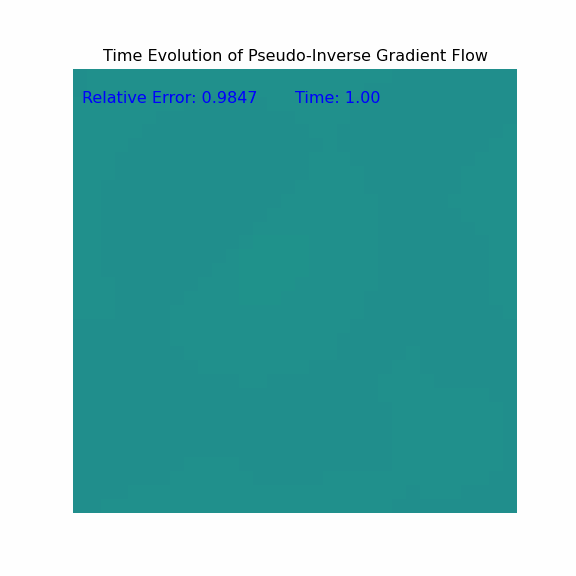

And we saved the best time that was discovered for the recovery (with
prior knowledge of the ground truth). So we can inspect that image, this
was the best that we could do with the gradient flow method.

In [ ]:
best_img = get_xhat(tracking['best_t']).reshape(dim, dim).detach().numpy()

plt.figure(figsize=(6, 6))
plt.imshow(best_img / np.max(np.abs(best_img)), cmap='viridis', vmin=-1, vmax=1)
plt.title(f'Best Reconstruction at t={tracking["best_t"]:.2f}\nRelative Error: {tracking["min_error"]:.4f}')
plt.axis('off')
plt.show()

## Recovery of the Adjoint Operator using Autograd

In this case we were able to compute the matrix form of $A$ and use its
transpose to compute the SVD, but in many cases this might be too
expensive or there may not be a closed form analytic solution to the
early stopping technique. In such cases we wish to recover the adjoint.
The question then is how to recover the adjoint operator from the `Amv`
operator? There are helpful tools available through the use of automatic
differentiation to track the gradients of the forward operator and
recover the adjoint operator. This is a very powerful tool that can be
used to recover the adjoint operator in a very general way.

By definition the adjoint has the property that:
$$\langle Ax, v \rangle = \langle x, A^\top v \rangle$$

### Explicit Computation of the Adjoint

We can compute the adjoint explicitly for the `Amv` operator based on
its computation from earlier. The discrete fourier transform matrix
operator $F$ has the property that $F^{-1} = F^\top$ so we can use this
to compute the adjoint.

$$
\begin{align}
A(x) &= \mathcal{F}^-1 \left( \mathcal{F}(P) \odot \mathcal{F}(x) \right)\\
&= F^\top \left( \text{diag} (F(P)) F(x) \right)\\
A^\top(v) &= F^\top \text{diag} (F(P))^* F v\\
\end{align}
$$

Where the hadamard operation of the two vectors has been modified to a
matrix form by diagonalizing the vector $F(P)$ that is the Fourier
transform of the point spread function. From this form it is posible to
take the adjoint of the operator by taking the complex conjugate of the
transpose of the entire operation.

### Autograd Computation of the Adjoint

We start with a new function $h = v^\top A(x)$ and we wish to compute
the gradient of $h$ with respect to $x$.

$$ \nabla_x h = \nabla_x (v^\top A(x)) = A^\top(v)$$

The gradient of $h$ with respect to $x$ is the adjoint operator
$A^\top(v)$. We can use the `torch.autograd.grad` function to compute
the gradient of $h$ with respect to $x$.

In [ ]:
def Amv_adjoint(v):
    x = torch.zeros(1, 1, dim, dim)
    x.requires_grad = True
    b = Amv(x)
    # Compute the dot product of the forward operator with the input vector
    h = torch.sum(b * v)
    # Compute the gradient of the dot product with respect to the input image
    adjoint = torch.autograd.grad(h, x, create_graph=True)[0]
    return adjoint

We can use this to recover $A^\top$ for the general case if we run the
operator on the set of basis vectors in the image space. This will give
us the adjoint operator in the form of a matrix. We can also use it to
confirm that it recovers the matrix transpose of the forward operator if
we are working with a simple matrix, reusing the `Amat` matrix from
earlier to take its transpose and compare it to the adjoint operator.

In [ ]:
Amat_adj = torch.zeros(n,n)

dim = 32 # Same as earlier
k=0
for i in range(dim):
  for j in range(dim):
    e_ij = torch.zeros_like(x)
    e_ij[:,:, i, j] = 1.0
    y = Amv_adjoint(e_ij)
    Amat_adj[:, k] = y.flatten()
    k = k+1

diff = torch.norm(Amat_adj - Amat.T)
print(f'Norm of difference between adjoint and transpose: {diff:.2e}')

So the difference is within the bounds of numerical precison and the
code appears to be working correctly.

## Gradient Descent with Adjoint

We can now use the defined operators (functions) from earlier to setup a
simple gradient descent algorithm with a step size and early stopping to
produce a recovery image that bypasses the need to compute the SVD
decomposition, which may be very expensive for large matrices.

In [ ]:
from tqdm import tqdm

def least_squares_sol(x0, b, Amv, Amv_adjoint, max_iter=1000, alpha=1e-3, tol=1e-6):
    """
    Solves the least squares problem using gradient descent with progress tracking.

    Parameters:
    - x0 (torch.Tensor): Initial guess for the solution.
    - b (torch.Tensor): Observation vector.
    - Amv (callable): Function to compute A @ x.
    - Amv_adjoint (callable): Function to compute A^T @ v.
    - max_iter (int): Maximum number of iterations.
    - alpha (float): Learning rate.
    - tol (float): Tolerance for convergence.

    Returns:
    - x (torch.Tensor): Approximated solution vector.
    """
    x = x0.clone()
    x.requires_grad = True
    b_noisy = b.clone() + 0.01 * torch.randn_like(b)

    # Initialize the progress bar
    with tqdm(total=max_iter, desc='Least Squares Iteration', unit='iter') as pbar:
        for i in range(max_iter):
            # Gradient descent update
            residual = Amv(x) - b_noisy
            gradient = Amv_adjoint(residual)
            xnext = x - alpha * gradient

            # Compute relative error
            error = torch.norm(xnext - x) 

            # Update the progress bar with the current error
            pbar.set_postfix({'Error': f'{error.item():.4e}'})
            pbar.update(1);

            # Check for convergence
            if error < tol:
                pbar.write(f'Converged at iteration {i+1} with error {error.item():.4e}')
                x = xnext
                break

            x = xnext

    return x

b = Amv(x)
x0 = torch.zeros_like(x)
xhat = least_squares_sol(x0, b, Amv, Amv_adjoint, max_iter=1000, alpha=1, tol=1e-6)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.imshow(x[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(xhat.detach().numpy()[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Recovered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

Note that torch does have the framework to run autograd on the least
squares objective itself, but for this general method we are using the
adjoint to compute the gradient (and indirectly invoking autograd). This
framework is the most general for when there might not be explicit
analytic solutions to the least squares problem, but we have the forward
operator and its adjoint.